In [1]:
#Import libraries and load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Read Data set and see top and bottom rows to have quick glimpse of data
df=pd.read_csv("DS_Salary_2021.csv")

In [3]:
df.head(3)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M


In [4]:
df.tail()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na
741,955,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute\n3.6,"Beavercreek, OH","Arlington, VA",501 - 1000,1967,...,0,0,0,0,0,0,0,other scientist,na,M


In [5]:
## for showing all features for that to set the display option
pd.set_option("display.max_columns",100)


In [6]:
df.tail(2)  ## now we can see the all columns

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,0,95,160,127.5,"Numeric, LLC",PA,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
741,955,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute\n3.6,"Beavercreek, OH","Arlington, VA",501 - 1000,1967,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),-1,0,0,61,126,93.5,Riverside Research Institute,OH,54,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,M


In [7]:
## Get shape of data to understand number of observations
df.shape

(742, 42)

In [8]:
## Get Feature names of dataset
df.keys()

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [9]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [10]:
## Get full Decription/summary of dataset
df.describe()

,index,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,0.225067,0.237197,0.522911,0.512129,0.088949,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,0.417908,0.425651,0.499812,0.500190,0.284862,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
##Get full info about all variables/features of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

In [12]:
#Understand the data types of Dataset and downgrade its type to save memory
df.Degree.unique()  ### its very lengthy to find one by one to each value  use for loop for feature we take int64 than for float 64

array(['M', 'na', 'P'], dtype=object)

In [13]:
## with the help of  this we can find the each unique value of features
#for k in df.keys():
#    print(k,df[k].unique())

In [14]:
for k in df.keys():
    if "int64" in str(df[k].dtype):
        print(k,df[k].dtype,df[k].min(),df[k].max())
    

index int64 0 955
Founded int64 -1 2019
Hourly int64 0 1
Employer provided int64 0 1
Lower Salary int64 15 202
Upper Salary int64 16 306
Age int64 -1 277
Python int64 0 1
spark int64 0 1
aws int64 0 1
excel int64 0 1
sql int64 0 1
sas int64 0 1
keras int64 0 1
pytorch int64 0 1
scikit int64 0 1
tensor int64 0 1
hadoop int64 0 1
tableau int64 0 1
bi int64 0 1
flink int64 0 1
mongo int64 0 1
google_an int64 0 1


In [15]:
for k in df.keys():
    if "int64"in str(df[k].dtype) and df[k].max() <= 255:
        df[k]=df[k].astype("int8")

In [16]:
for k in df.keys():
    if "int64" in str(df[k].dtype) and df[k].max() > 255:
        df[k]=df[k].astype("int16")

In [17]:
### for float 
for k in df.keys():
    if "float64" in str(df[k].dtype):
        print(k,df[k].dtype,df[k].min(),df[k].max())

Rating float64 -1.0 5.0
Avg Salary(K) float64 15.5 254.0


In [18]:
for k in df.keys():
    if "float64" in str(df[k].dtype):
        df[k]=df[k].astype("float16")
        

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int16  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float16
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int16  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int8   
 16  Employer

In [20]:
df.head(2) ## here in many feature 2 data given in same feature we  have to seperate out 

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.800781,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.400391,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M


In [21]:
df["Salary Estimate"] 

0       $53K-$91K (Glassdoor est.)
1      $63K-$112K (Glassdoor est.)
2       $80K-$90K (Glassdoor est.)
3       $56K-$97K (Glassdoor est.)
4      $86K-$143K (Glassdoor est.)
                  ...             
737    $58K-$111K (Glassdoor est.)
738    $72K-$133K (Glassdoor est.)
739     $56K-$91K (Glassdoor est.)
740    $95K-$160K (Glassdoor est.)
741    $61K-$126K (Glassdoor est.)
Name: Salary Estimate, Length: 742, dtype: object

In [22]:
lam=lambda text_data:text_data.split("-")

In [23]:
lam(df["Salary Estimate"][0])

['$53K', '$91K (Glassdoor est.)']

In [24]:
lam(df["Salary Estimate"][4])

['$86K', '$143K (Glassdoor est.)']

In [25]:
#### we have to remove $ K and other than numeric value
import re
## here min and max salary is given 

In [26]:
def getMinSal(text):
    so=re.search("\$(\d+)K-\$(\d+)K",text)  ## capital K not small
    if so:
        return int(so.group(1))

In [27]:
getMinSal(df["Salary Estimate"][4])


86

In [28]:
def getmaxsal(text):
    so=re.search("\$(\d+)K-\$(\d+)K",text)  ## capital K not small
    if so:
        return int(so.group(2))

In [29]:
getmaxsal(df["Salary Estimate"][4])

143

In [30]:
df["min_sal"]=df["Salary Estimate"].map(getMinSal)
df["max_sal"]=df["Salary Estimate"].map(getmaxsal)

In [31]:
df["min_sal"]

0      53.0
1      63.0
2      80.0
3      56.0
4      86.0
       ... 
737    58.0
738    72.0
739    56.0
740    95.0
741    61.0
Name: min_sal, Length: 742, dtype: float64

In [32]:
df["max_sal"]

0       91.0
1      112.0
2       90.0
3       97.0
4      143.0
       ...  
737    111.0
738    133.0
739     91.0
740    160.0
741    126.0
Name: max_sal, Length: 742, dtype: float64

In [33]:
df.head(1)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,min_sal,max_sal
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.800781,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M,53.0,91.0


In [34]:
df["Size"]

0       501 - 1000 
1           10000+ 
2       501 - 1000 
3      1001 - 5000 
4         51 - 200 
           ...     
737         10000+ 
738    1001 - 5000 
739     501 - 1000 
740         1 - 50 
741     501 - 1000 
Name: Size, Length: 742, dtype: object

In [35]:
df.head(1)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,min_sal,max_sal
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.800781,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M,53.0,91.0


In [58]:
df["Job Description"]

0       ata cientist ocation lbuquerque ducation equi...
1       hat ou ill o eneral ummary he ealthcare ata c...
2       now e4 nc is a high growth information securi...
3       rganization and ob ob 310709 irectorate arth ...
4       ata cientist ffinity olutions arketing loud s...
                             ...                        
737     ite ame assachusetts ambridge osted ate ar 24...
738     ventbrite has a world class data repository o...
739     he uton ab at arnegie ellon niversity is a la...
740     ata cience anager esponsibilities versee a te...
741     eturning andidate og back in to the areer ort...
Name: Job Description, Length: 742, dtype: object

In [59]:
def cleanjobdes(text):
    jd=re.sub("[^a-zA-Z0-9]"," ",text)
    return jd

In [60]:
df["Job Description"]=df["Job Description"].map(cleanjobdes)

In [61]:
df["Job Description"][0]

' ata cientist ocation lbuquerque ducation equired achelor s degree required preferably in math engineering business or the sciences kills equired achelor s egree in relevant field e g math data analysis database computer science rtificial ntelligence three years experience credit for aster s degree five years experience credit for a h pplicant should be proficient in the use of ower ableau ython icrosoft ord ower oint xcel and working knowledge of ccess data visualization tools and have a strong algorithmic aptitude xcellent verbal and written communication skills and quantitative analytical skills are required pplicant must be able to work in a team environment citizenship and ability to obtain a o ecret learance required esponsibilities he applicant will be responsible for formulating analytical solutions to complex data problems creating data analytic models to improve data metrics analyzing customer behavior and trends delivering insights to stakeholders as well as designing and c

In [62]:
text=" ".join(df["Job Description"])

(-0.5, 399.5, 199.5, -0.5)

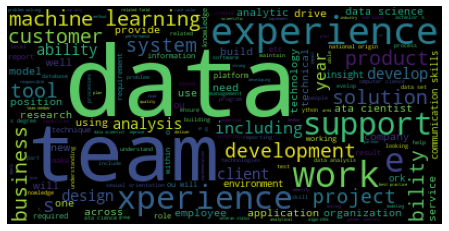

In [64]:
wc=WordCloud()
image=wc.generate_from_text(text)
plt.figure(figsize=(16,4))
plt.imshow(image)
plt.axis("off")

In [65]:
df.isnull().sum()

index                  0
Job Title              0
Salary Estimate        0
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded                0
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors            0
Hourly                 0
Employer provided      0
Lower Salary           0
Upper Salary           0
Avg Salary(K)          0
company_txt            0
Job Location           0
Age                    0
Python                 0
spark                  0
aws                    0
excel                  0
sql                    0
sas                    0
keras                  0
pytorch                0
scikit                 0
tensor                 0
hadoop                 0
tableau                0
bi                     0
flink                  0
mongo                  0
google_an              0
job_title_sim          0


In [70]:
df["min_sal"].median()

71.0

In [75]:
df["max_sal"].median()

126.0

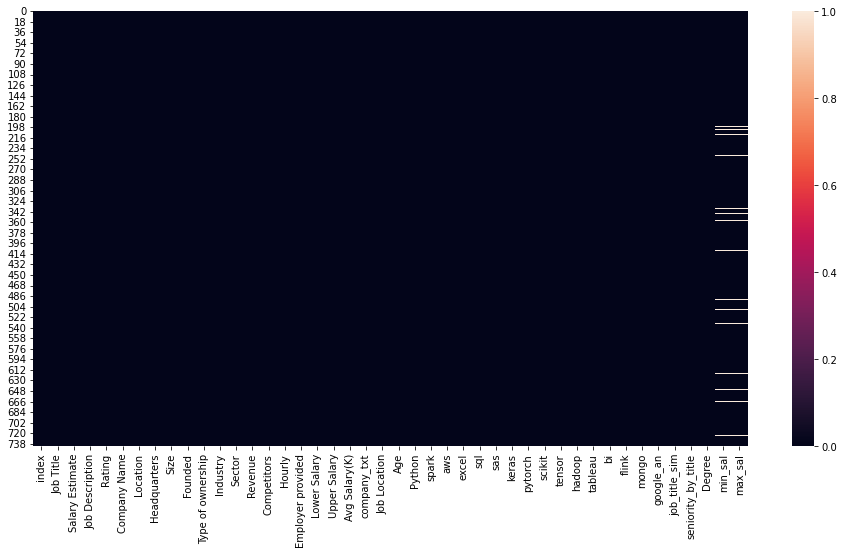

In [73]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())
plt.show()



In [74]:
df["min_sal"]=df["min_sal"].fillna(df["min_sal"].median())

In [77]:
df["max_sal"]=df["max_sal"].fillna(df["max_sal"].median())

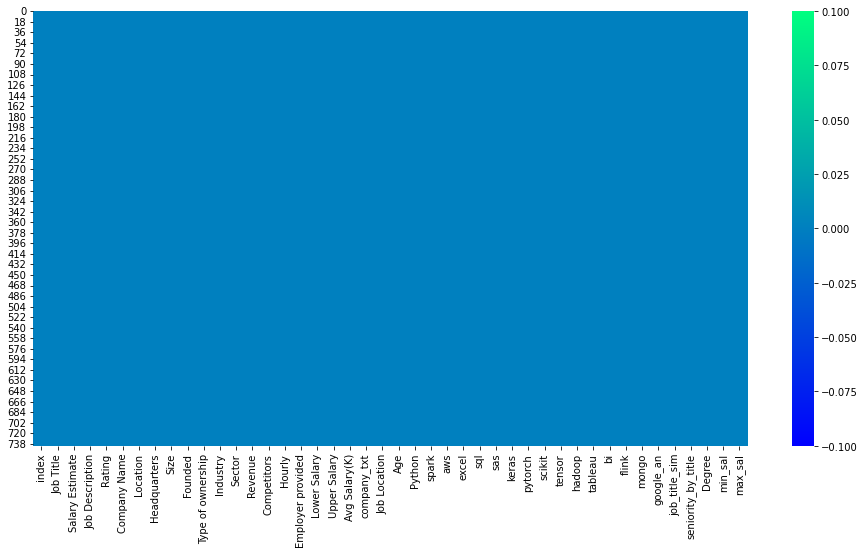

In [79]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(),cmap="winter")
plt.show()

<AxesSubplot:xlabel='max_sal', ylabel='Density'>

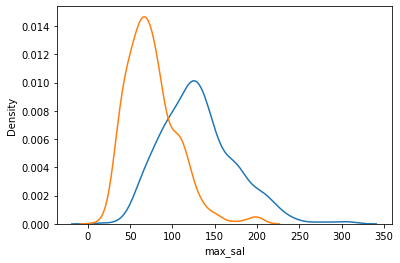

In [82]:
sns.kdeplot(df.max_sal)
sns.kdeplot(df.min_sal)

<AxesSubplot:xlabel='min_sal', ylabel='Density'>

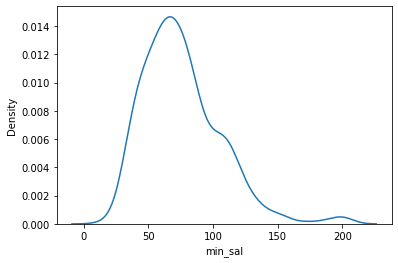

In [81]:
sns.kdeplot(df.min_sal)

<AxesSubplot:xlabel='min_sal', ylabel='Density'>

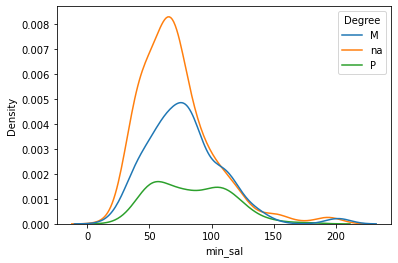

In [83]:
sns.kdeplot(df.min_sal,hue=df.Degree)

<AxesSubplot:xlabel='Avg Salary(K)', ylabel='Count'>

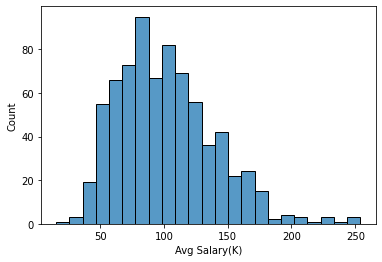

In [88]:
sns.histplot(df["Avg Salary(K)"])